In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1
613,58,M,ASY,140,385,1,LVH,135,N,0.3,Up,0
683,44,F,NAP,118,242,0,Normal,149,N,0.3,Flat,0
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df = df.drop(['ChestPainType','RestingECG','ST_Slope','FastingBS','ExerciseAngina','Oldpeak','MaxHR'], axis = 1).copy()
df

,Age,Sex,RestingBP,Cholesterol,HeartDisease
0,40,M,140,289,0
1,49,F,160,180,1
2,37,M,130,283,0
3,48,F,138,214,1
4,54,M,150,195,0
...,...,...,...,...,...
913,45,M,110,264,1
914,68,M,144,193,1
915,57,M,130,131,1
916,57,F,130,236,1


In [10]:
gender = pd.get_dummies(df['Sex'], dtype = int)

In [11]:
df = pd.concat([df,gender], axis = 1)

In [12]:
df

,Age,Sex,RestingBP,Cholesterol,HeartDisease,F,M
0,40,M,140,289,0,0,1
1,49,F,160,180,1,1,0
2,37,M,130,283,0,0,1
3,48,F,138,214,1,1,0
4,54,M,150,195,0,0,1
...,...,...,...,...,...,...,...
913,45,M,110,264,1,0,1
914,68,M,144,193,1,0,1
915,57,M,130,131,1,0,1
916,57,F,130,236,1,1,0


In [13]:
df.drop(['Sex'], axis = 1, inplace = True)

In [14]:
df

,Age,RestingBP,Cholesterol,HeartDisease,F,M
0,40,140,289,0,0,1
1,49,160,180,1,1,0
2,37,130,283,0,0,1
3,48,138,214,1,1,0
4,54,150,195,0,0,1
...,...,...,...,...,...,...
913,45,110,264,1,0,1
914,68,144,193,1,0,1
915,57,130,131,1,0,1
916,57,130,236,1,1,0


In [15]:
df.rename(columns = {'F':'Female','M':'Male','RestingBP':'Blood_pressure'}, inplace = True)

In [17]:
df = df[['Age', 'Male', 'Female', 'Blood_pressure', 'Cholesterol', 'HeartDisease']]
df

,Age,Male,Female,Blood_pressure,Cholesterol,HeartDisease
0,40,1,0,140,289,0
1,49,0,1,160,180,1
2,37,1,0,130,283,0
3,48,0,1,138,214,1
4,54,1,0,150,195,0
...,...,...,...,...,...,...
913,45,1,0,110,264,1
914,68,1,0,144,193,1
915,57,1,0,130,131,1
916,57,0,1,130,236,1


In [25]:
df.isna().sum().sum()

0

In [26]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [27]:
df.loc[df.duplicated()]

,Age,Male,Female,Blood_pressure,Cholesterol,HeartDisease
62,45,1,0,140,224,0
327,59,1,0,125,0,1
357,53,1,0,120,0,1
363,56,1,0,120,0,1
369,63,1,0,150,0,1
380,60,1,0,160,0,1
385,61,1,0,150,0,1
392,61,1,0,130,0,1
401,51,1,0,130,0,1
404,47,1,0,110,0,1


In [29]:
df = df.loc[~df.duplicated(subset = ['Age','Blood_pressure','Cholesterol'])].reset_index(drop = True)

In [30]:
df

,Age,Male,Female,Blood_pressure,Cholesterol,HeartDisease
0,40,1,0,140,289,0
1,49,0,1,160,180,1
2,37,1,0,130,283,0
3,48,0,1,138,214,1
4,54,1,0,150,195,0
...,...,...,...,...,...,...
884,45,1,0,110,264,1
885,68,1,0,144,193,1
886,57,1,0,130,131,1
887,57,0,1,130,236,1


In [35]:
df1 = df.groupby(['HeartDisease'])

In [37]:
df2 = df1.get_group(1)

In [39]:
df2

,Age,Male,Female,Blood_pressure,Cholesterol,HeartDisease
1,49,0,1,160,180,1
3,48,0,1,138,214,1
8,37,1,0,140,207,1
11,58,1,0,136,164,1
13,49,1,0,140,234,1
...,...,...,...,...,...,...
883,57,0,1,140,241,1
884,45,1,0,110,264,1
885,68,1,0,144,193,1
886,57,1,0,130,131,1


Text(0, 0.5, 'Cases')

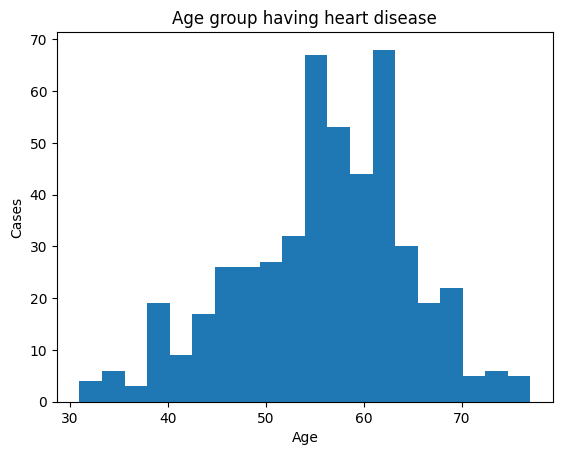

In [54]:
ax = df2['Age'].plot(kind = 'hist',bins = 20, title = 'Age group having heart disease')
ax.set_xlabel('Age')
ax.set_ylabel('Cases')

Text(0, 0.5, 'Cases')

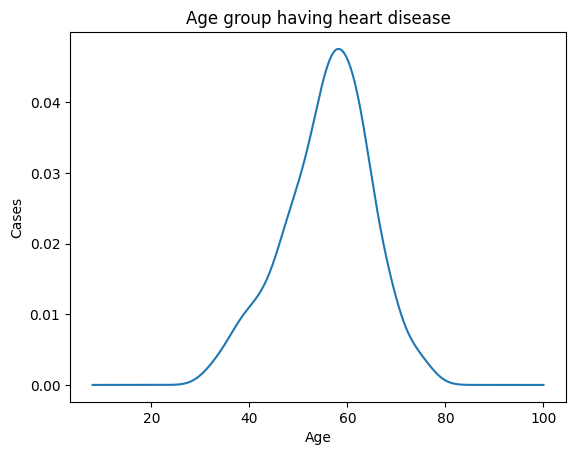

In [56]:
ax = df2['Age'].plot(kind = 'kde', title = 'Age group having heart disease')
ax.set_xlabel('Age')
ax.set_ylabel('Cases')

In [63]:
df3 = df2.copy().groupby(['Male']).get_group(1).drop(['Female'], axis = 1, inplace = True)
df4 = df2.copy().groupby(['Female']).get_group(1).drop(['Male'], axis = 1, inplace = True)

# wants to make a comparison among male and female which has greater heart attack rate through graphs

<function matplotlib.pyplot.show(close=None, block=None)>

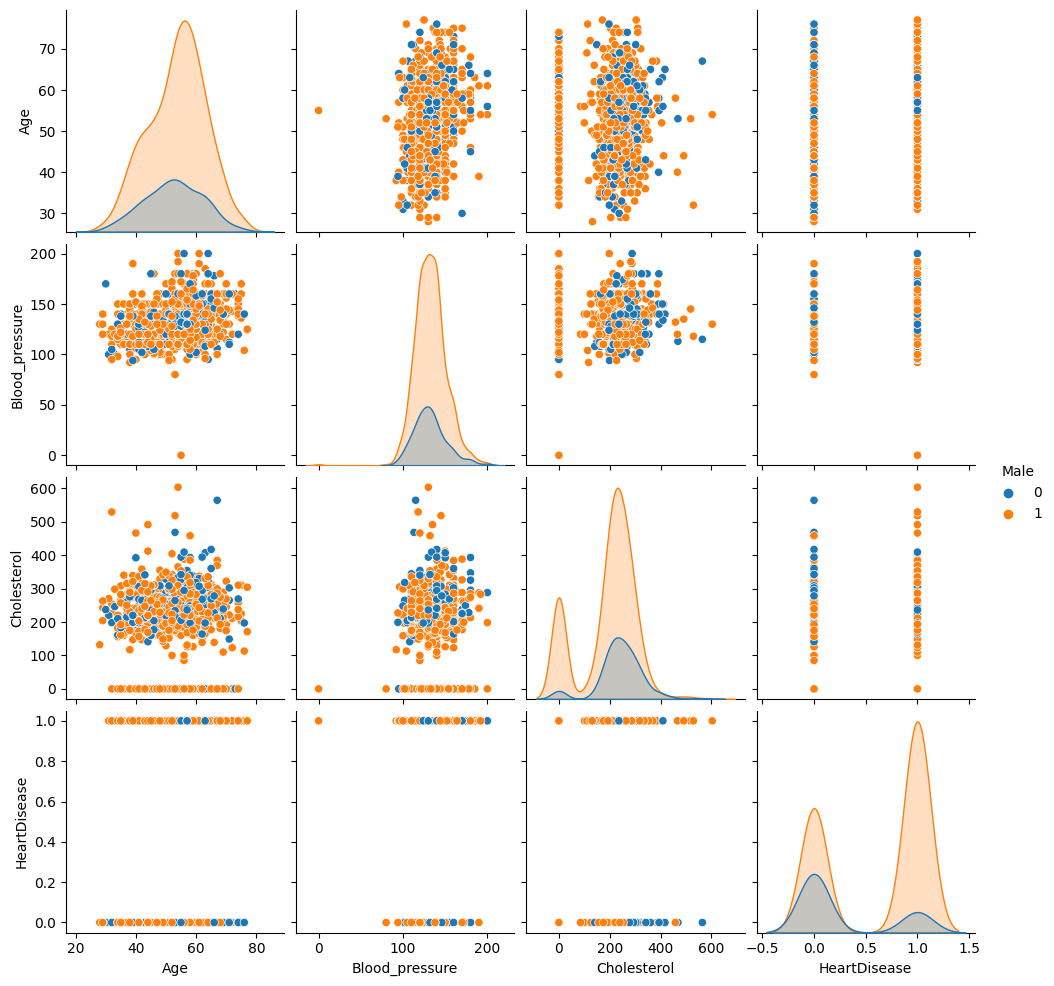

In [70]:
sns.pairplot(df,vars = ['Age',
                        'Blood_pressure',
                        'Cholesterol',
                        'HeartDisease'],
            hue = 'Male')
plt.show

<AxesSubplot: >

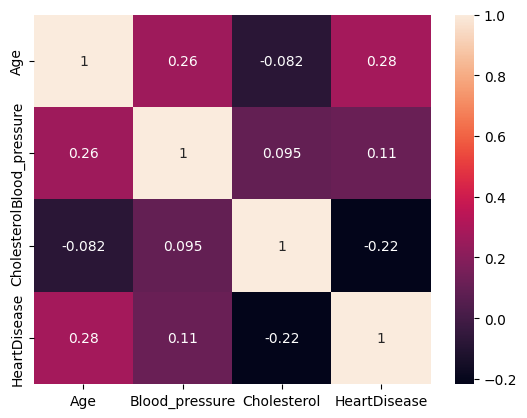

In [73]:
df_corr = df[['Age','Blood_pressure','Cholesterol','HeartDisease']].dropna().corr()
sns.heatmap(df_corr, annot = True)